# NYC Taxi Veri Analizi

## Kolon Bilgileri

### VendorID 
Kaydı sağlayan şirket ID (1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.)
### tpep_pickup_datetime
Taksi metrenin açılma tarihi ve saati
### tpep_dropoff_datetime
Taksi metrenin kapanma tarihi ve saati
### passenger_count 
Taksi şoförü tarafından girilen yolcu sayısı
### trip_distance
Taksimetre tarafından tutulan tahmini katedilen mesafe (mil)
### RatecodeID
Yolculuk sonunda geçerli olan son fiyat kodu
1=Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride
### store_and_fwd_flag
Yolculuk kaydının tedarikçilere gönderilmeden önce taşıtlardaki cihazlarda tutulup tutulmadığını belirten flag
Y= store and forward trip
N= not a store and forward trip
### PULocationID
Taksimetrenin açıldığı bölge
### DOLocationID
Taksimetrenin kapatıldığı bölge
### payment_type
Yolcunun ödemeyi nasıl yaptığını belirten numerik bir kod
1= Kredi Kartı (Credit card)
2= Nakit (Cash)
3= Ücretsiz (No charge)
4= İtiraz (Dispute)
5= Bilinmeyen (Unknown)
6= Geçersiz Seyahat (Voided trip)
### fare_amount
Taksimetrenin zaman/mesafe ücreti
### extra
Extra giderler
### mta_tax
Tetiklenen MTA vergisi
### tip_amount
Kredi kartı ile verile bahşişler (nakitler dahil edilmemiştir)
### tolls_amount
Yolculuk boyunca verilen geçiş ücretleri
### improvement_surcharge
İlave maliyetler
### total_amount
Yolcuya toplamda yolculuğun maliyeti (nakit bahşişler dahil değildir)

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions as fonk
# from scipy.stats import norm
# import matplotlib.mlab as mlab
from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
%matplotlib inline

np.random.seed(101)

In [3]:
# datamiz = pd.read_csv('yellow_tripdata_2017-12.csv')

In [4]:
# datamiz.head(300)

In [5]:
# tarihler = pd.to_datetime(datamiz.tpep_pickup_datetime)
# tarihler.count()
# 9,508,276 kayıt vardır.

## Pazartesi günlerinin tek bir DataFrame'de toplanması

In [6]:
# start_date = pd.Timestamp('2017-12-04 00:00:00')
# end_date = pd.Timestamp('2017-12-04 23:59:59')
# mask = (tarihler> start_date) & (tarihler <= end_date)

# start_date = pd.Timestamp('2017-12-11 00:00:00')
# end_date = pd.Timestamp('2017-12-11 23:59:59')
# mask+= (tarihler> start_date) & (tarihler <= end_date)

# start_date = pd.Timestamp('2017-12-18 00:00:00')
# end_date = pd.Timestamp('2017-12-18 23:59:59')
# mask+= (tarihler> start_date) & (tarihler <= end_date)

# #    Test Pazartesi
# start_date = pd.Timestamp('2017-12-25 00:00:00')
# end_date = pd.Timestamp('2017-12-25 23:59:59')
# mask2= (tarihler> start_date) & (tarihler <= end_date)

# train_pazartesi = datamiz.loc[mask]
# test_pazartesi = datamiz.loc[mask2]
# train_pazartesi.to_csv('train_pazartesi.csv')
# test_pazartesi.to_csv('test_pazartesi.csv')

### Train Verisi

In [7]:
train_pazartesi = pd.read_csv('train_pazartesi.csv')
train_pazartesi = train_pazartesi.sort_values('tpep_pickup_datetime')

# # Düzgün bir index sıralaması alıyoruz
train_pazartesi = fonk.reindexing(train_pazartesi)

train_pazartesi['tpep_pickup_datetime'] = pd.to_datetime(train_pazartesi['tpep_pickup_datetime'])
train_pazartesi = fonk.splitDateTime(train_pazartesi)

In [8]:
# train_pazartesi.head()

In [9]:
# TRAIN için
# istenilen saat aralığını alıyoruz ve günlere bölüyoruz
train_dort_aralik_oglen = fonk.oglen('2017-12-04 11:59:59','2017-12-04 13:00:00',train_pazartesi)
train_onbir_aralik_oglen = fonk.oglen('2017-12-11 11:59:59','2017-12-11 13:00:00',train_pazartesi)
train_onsekiz_aralik_oglen = fonk.oglen('2017-12-18 11:59:59','2017-12-18 13:00:00',train_pazartesi)

train_tum_oglen = fonk.alloglen(train_dort_aralik_oglen,train_onbir_aralik_oglen,train_onsekiz_aralik_oglen)

train_tum_oglen = train_tum_oglen.sort_values('Time')
train_tum_oglen = fonk.reindexing(train_tum_oglen)


In [10]:
# train_tum_oglen.head()

### Test Verisi

In [11]:
test_pazartesi = pd.read_csv('test_pazartesi.csv')
test_pazartesi = test_pazartesi.sort_values('tpep_pickup_datetime')

# Düzgün bir index sıralaması alıyoruz
test_pazartesi = fonk.reindexing(test_pazartesi)

test_pazartesi['tpep_pickup_datetime'] = pd.to_datetime(test_pazartesi['tpep_pickup_datetime'])
test_pazartesi = fonk.splitDateTime(test_pazartesi)

In [12]:
# test_pazartesi.head()

In [13]:
# TEST için
# istenilen saat aralığını alıyoruz ve günlere bölüyoruz
test_yirmibes_aralik_oglen = fonk.oglen('2017-12-25 11:59:59','2017-12-25 13:00:00',test_pazartesi)

test_yirmibes_aralik_oglen = test_yirmibes_aralik_oglen.sort_values('Time')
test_yirmibes_aralik_oglen = fonk.reindexing(test_yirmibes_aralik_oglen)

In [14]:
# test_yirmibes_aralik_oglen.head()

In [14]:
# 04 Aralık, 11 Aralık ve 18 Aralık Pazartesi günleri için 913,005 tane kayıt vardır.
# train_pazartesi.shape

In [15]:
# test_pazartesi.shape

In [16]:
# test_pazartesi.dtypes

In [17]:
# test_pazartesi

In [18]:
# train_pazartesi[train_pazartesi.total_amount>99]

In [19]:
# train_pazartesi.head(200)

In [20]:
# train_pazartesi.describe().transpose()

In [159]:
# Max row
# train_pazartesi.loc[[254177]]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
254177,1,2017-12-04 20:32:31,2017-12-04 20:49:07,1,5.7,1,N,137,255,2,19.0,0.5,0.5,0.0,900.09,0.3,920.39


In [160]:
# train_pazartesi.loc[[592536]]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
592536,1,2017-12-11 22:26:55,2017-12-11 22:34:05,1,1.0,5,N,161,48,3,0.0,0.0,0.0,0.0,810.5,0.3,810.8


# Verinin İncelenmesi 

## Train günlerini ayrı ayrı ayırıp incelemek

### 4 Aralık 2017

In [161]:
# start_date_dort_aralik = pd.Timestamp('2017-12-04 00:00:00')
# end_date_dort_aralik = pd.Timestamp('2017-12-04 23:59:59')
# df_daralik = (train_pazartesi['tpep_pickup_datetime']>start_date_dort_aralik) & (train_pazartesi['tpep_pickup_datetime']<end_date_dort_aralik)
# dort_aralik_df = train_pazartesi.loc[df_daralik]

In [162]:
# dort_aralik_df
# dort_aralik_df.dtypes

### 11 Aralık 2017

In [163]:
# start_date_onbir_aralik = pd.Timestamp('2017-12-11 00:00:00')
# end_date_onbir_aralik = pd.Timestamp('2017-12-11 23:59:59')
# df_obaralik = (train_pazartesi['tpep_pickup_datetime']>start_date_onbir_aralik) & (train_pazartesi['tpep_pickup_datetime']<end_date_onbir_aralik)
# onbir_aralik_df = train_pazartesi.loc[df_obaralik]

In [164]:
# onbir_aralik_df
# onbir_aralik_df.dtypes

### 18 Aralık 2017

In [165]:
# start_date_onsekiz_aralik = pd.Timestamp('2017-12-18 00:00:00')
# end_date_onsekiz_aralik = pd.Timestamp('2017-12-18 23:59:59')
# df_osaralik = (train_pazartesi['tpep_pickup_datetime']>start_date_onsekiz_aralik) & (train_pazartesi['tpep_pickup_datetime']<end_date_onsekiz_aralik)
# onsekiz_aralik_df = train_pazartesi.loc[df_osaralik]

In [166]:
# onsekiz_aralik_df
# onbir_aralik_df.dtypes

In [167]:
label_train = pd.DataFrame(data=train_pazartesi['total_amount'],columns=['total_amount'])
total_amount = pd.DataFrame(data=train_pazartesi['total_amount'],columns=['total_amount'])

payment_type = pd.DataFrame(data=train_pazartesi['payment_type'],columns=['payment_type'])
tolls_amount = pd.DataFrame(data=train_pazartesi['tolls_amount'],columns=['tolls_amount'])
trip_distance = pd.DataFrame(data=train_pazartesi['trip_distance'],columns=['trip_distance'])
fare_amount = pd.DataFrame(data=train_pazartesi['fare_amount'],columns=['fare_amount'])
pickup_location = pd.DataFrame(data=train_pazartesi['PULocationID'],columns=['PULocationID'])

In [168]:
# Pazartesileri ortalama kazanç
label_train.mean()

total_amount    16.620112
dtype: float64

In [169]:
# Train datası içerisindeki tüm pazartesileri için median
label_train.median()

total_amount    11.8
dtype: float64

### Anomaliler

In [170]:
# Max tutar
label_train.idxmax() # en büyük değerin indexini verir
label_train.loc[[254177]] # id ile erişim.

,total_amount
254177,920.39


In [171]:
label_train[label_train.total_amount<900].idxmax()
label_train.loc[[592536]]

,total_amount
592536,810.8


### İlk 200 Verinin Ücret Dağılımı (Sadece Pazartesi günleri)

Text(0,0.5,'Ücret')

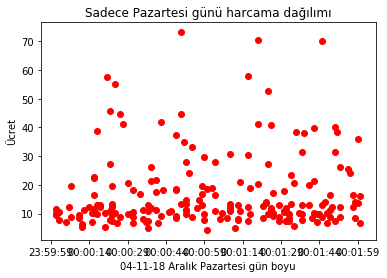

In [172]:
plt.plot(train_pazartesi['tpep_pickup_datetime'].head(200),label_train.head(200),'ro')
plt.title("Sadece Pazartesi günü harcama dağılımı")
plt.xlabel('04-11-18 Aralık Pazartesi gün boyu')
plt.ylabel('Ücret')

### İlk 200 Verinin Ödeme tipi ve Ücretler İlişkisi
#### 1 = Kredi Kartı, 2 = Nakit, 3 = Ücretsiz

([<matplotlib.axis.YTick at 0x7f090c590cf8>,
 <a list of 6 Text yticklabel objects>)

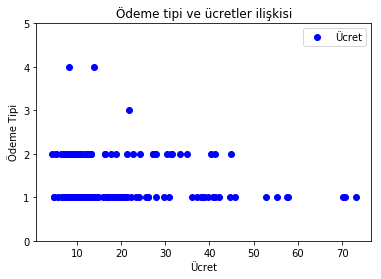

In [173]:
plt.plot(train_pazartesi['total_amount'].head(200),payment_type.head(200),'bo',label="Ücret")
plt.title("Ödeme tipi ve ücretler ilişkisi")
plt.legend()
plt.xlabel('Ücret')
plt.ylabel('Ödeme Tipi')
plt.yticks(np.arange(0, 6, step=1))

### İlk 200 Verinin Toplam Miktar & Geçiş Ücreti İlişkisi

Text(0,0.5,'Geçiş Ücreti')

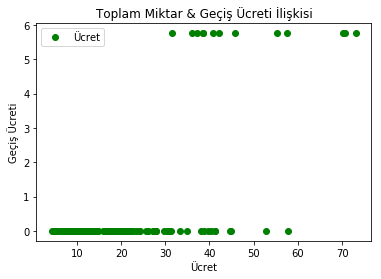

In [174]:
plt.plot(train_pazartesi['total_amount'].head(200),tolls_amount.head(200),'go',label="Ücret")
plt.title("Toplam Miktar & Geçiş Ücreti İlişkisi")
plt.legend()
plt.xlabel('Ücret')
plt.ylabel('Geçiş Ücreti')

### İlk 200 Verinin Toplam Miktar & Katedilen Yol İlişkisi

Text(0,0.5,'Mesafe')

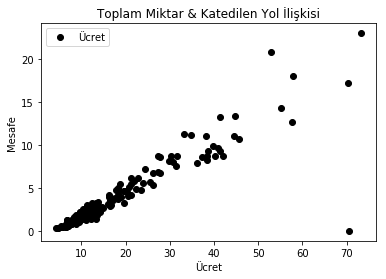

In [175]:
plt.plot(total_amount.head(200),trip_distance.head(200),'ko',label="Ücret")
plt.title("Toplam Miktar & Katedilen Yol İlişkisi")
plt.legend()
plt.xlabel('Ücret')
plt.ylabel('Mesafe')

Text(0,0.5,'Konum ID')

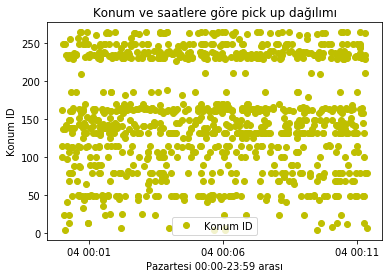

In [176]:
plt.plot(train_pazartesi['tpep_pickup_datetime'].head(1000),pickup_location.head(1000),'yo',label="Konum ID")
plt.title("Konum ve saatlere göre pick up dağılımı")
plt.legend()
plt.xlabel('Pazartesi 00:00-23:59 arası')
plt.ylabel('Konum ID')

## 1 - Kayıt tahmin sınıflandırma hücresi (12:00-13:00 arası için)

In [10]:
# Train datası içerisindeki 0'dan küçük görünen verilerin temizlenmesi 
train_x = pd.DataFrame(data=train_tum_oglen)
train_x = train_x[train_x.total_amount>0] 
train_y = train_x['VendorID'].apply(fonk.label_fix)

train_x = train_x.drop('VendorID',axis=1)
train_x = train_x.drop('tpep_pickup_datetime',axis=1)
train_x = train_x.drop('tpep_dropoff_datetime',axis=1)

# Test datası içerisindeki 0'dan küçük görünen verilerin temizlenmesi 
test_x = pd.DataFrame(data=test_yirmibes_aralik_oglen)
test_x = test_x[test_x.total_amount>0]
test_y = test_x['VendorID'].apply(fonk.label_fix)

test_x = test_x.drop('VendorID',axis=1)
test_x = test_x.drop('tpep_pickup_datetime',axis=1)
test_x = test_x.drop('tpep_dropoff_datetime',axis=1)

# 'N' 'Y' değerlerinden kurtulmak için integera çeviriyoruz
train_x['store_and_fwd_flag'] = train_x['store_and_fwd_flag'].apply(fonk.label_keras_fix)
test_x['store_and_fwd_flag'] = test_x['store_and_fwd_flag'].apply(fonk.label_keras_fix)

train_x = train_x.drop('Date',axis=1)
train_x = train_x.drop('Time',axis=1)
test_x = test_x.drop('Date',axis=1)
test_x = test_x.drop('Time',axis=1)

col_to_norm = ['trip_distance', 'fare_amount','tip_amount', 'tolls_amount', 'total_amount']
fonk.scaling(train_x,test_x,col_to_norm)

In [11]:
# test_x.head()

In [13]:
# test_x.head()

## 2 - Ücret tahmin problemi için regression hücresi (yine 12:00-13:00 arası)

In [15]:
reg_train_x = train_tum_oglen.drop('Date',axis=1).drop('total_amount',axis=1).drop('Time',axis=1).drop('tpep_pickup_datetime',axis=1).drop('tpep_dropoff_datetime',axis=1)
reg_train_x['VendorID'] = reg_train_x['VendorID'].apply(fonk.label_fix)
reg_train_x['store_and_fwd_flag'] = reg_train_x['store_and_fwd_flag'].apply(fonk.label_keras_fix)

reg_train_y = pd.DataFrame(data=train_tum_oglen['total_amount'])

In [16]:
reg_train_x.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
index,,,,,,,,,,,,,,
0,0,1,2.60,1,0,163,186,1,18.0,0.0,0.5,4.00,0.0,0.3
1,1,3,1.84,1,0,79,170,2,11.5,0.0,0.5,0.00,0.0,0.3
2,0,1,2.30,1,0,236,41,1,11.5,0.0,0.5,0.00,0.0,0.3
3,1,3,1.41,1,0,144,232,1,8.0,0.0,0.5,1.76,0.0,0.3
4,0,1,1.20,1,0,136,235,2,6.5,0.0,0.5,0.00,0.0,0.3


In [17]:
reg_test_x = test_yirmibes_aralik_oglen.drop('Date',axis=1).drop('total_amount',axis=1).drop('Time',axis=1).drop('tpep_pickup_datetime',axis=1).drop('tpep_dropoff_datetime',axis=1)
reg_test_x['VendorID'] = reg_train_x['VendorID'].apply(fonk.label_fix)
reg_test_x['store_and_fwd_flag'] = reg_test_x['store_and_fwd_flag'].apply(fonk.label_keras_fix)

reg_test_y = pd.DataFrame(data=test_yirmibes_aralik_oglen['total_amount'])

In [18]:
# reg_test_x.head()

In [19]:
# 0-1 aralığına çekiyoruz verileri
col_to_norm = ['trip_distance', 'fare_amount','tip_amount']
fonk.scaling(reg_train_x,reg_test_x,col_to_norm)

reglabel_col_to_norm = ['total_amount']
fonk.scaling(reg_train_y,reg_test_y,reglabel_col_to_norm)

## 3 - Logistic Regression (Varış noktasına göre Başlangıç noktası tahmin etme)

In [163]:
softmax_train_x = train_tum_oglen.drop('Date',axis=1).drop('Time',axis=1).drop('tpep_pickup_datetime',axis=1).drop('tpep_dropoff_datetime',axis=1)
softmax_train_x['VendorID'] = reg_train_x['VendorID'].apply(fonk.label_fix)
softmax_train_x['store_and_fwd_flag'] = reg_train_x['store_and_fwd_flag'].apply(fonk.label_keras_fix)

softmax_train_y = pd.DataFrame(data=train_tum_oglen['PULocationID'])

In [164]:
softmax_test_x = test_yirmibes_aralik_oglen.drop('Date',axis=1).drop('Time',axis=1).drop('tpep_pickup_datetime',axis=1).drop('tpep_dropoff_datetime',axis=1)
softmax_test_x['VendorID'] = reg_train_x['VendorID'].apply(fonk.label_fix)
softmax_test_x['store_and_fwd_flag'] = softmax_test_x['store_and_fwd_flag'].apply(fonk.label_keras_fix)

softmax_test_y = pd.DataFrame(data=test_yirmibes_aralik_oglen['PULocationID'])

In [165]:
# 0-1 aralığına çekiyoruz verileri
col_to_norm = ['trip_distance', 'fare_amount','tip_amount', 'tolls_amount', 'total_amount']
fonk.scaling(softmax_train_x,softmax_test_x,col_to_norm)
label_cols_to_norm = ['PULocationID']
fonk.scaling(softmax_train_y,softmax_test_y,label_cols_to_norm)

# Estimator API

In [6]:
# Continious / Numeric Değerler

# pickup_datetime = tf.feature_column.numeric_column('tpep_pickup_datetime')
# dropoff_datetime = tf.feature_column.numeric_column('tpep_dropoff_datetime')
passenger_count = tf.feature_column.numeric_column('passenger_count')
trip_distance = tf.feature_column.numeric_column('trip_distance')
ratecode_id = tf.feature_column.numeric_column('RatecodeID')
pu_loc_id = tf.feature_column.numeric_column('PULocationID')
do_loc_id = tf.feature_column.numeric_column('DOLocationID')
payment_type = tf.feature_column.numeric_column('payment_type')
fare_amount = tf.feature_column.numeric_column('fare_amount')
extra = tf.feature_column.numeric_column('extra')
mta_tax = tf.feature_column.numeric_column('mta_tax')
tip_amount = tf.feature_column.numeric_column('tip_amount')
tolls_amount = tf.feature_column.numeric_column('tolls_amount')
imp_scharge = tf.feature_column.numeric_column('improvement_surcharge')
totalamount = tf.feature_column.numeric_column('total_amount')

# Vocabulary List ile, diğer değerler

store_and_fwd_flag = tf.feature_column.categorical_column_with_vocabulary_list('store_and_fwd_flag',['N','Y'])

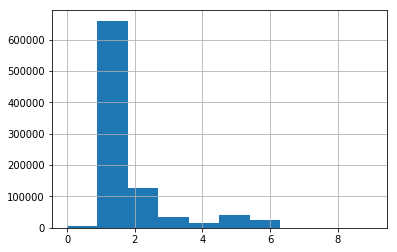

In [7]:
train_x['passenger_count'].hist(bins=10) # bin; bar kalınlığı için.

In [8]:
# feature cols
feat_cols = [passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,
             pu_loc_id,do_loc_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_scharge,
             totalamount]

# input function
input_func = tf.estimator.inputs.pandas_input_fn(x=train_x,y=train_y,batch_size=100,
                                                num_epochs=1000, shuffle=True)

## Linear Classifier Estimator API

In [27]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2i3qi7u1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff4e5782358>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [28]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp2i3qi7u1/model.ckpt.
INFO:tensorflow:loss = 69.31472, step = 1
INFO:tensorflow:global_step/sec: 281.456
INFO:tensorflow:loss = 139.6036, step = 101 (0.356 sec)
INFO:tensorflow:global_step/sec: 364.722
INFO:tensorflow:loss = 85.227234, step = 201 (0.275 sec)
INFO:tensorflow:global_step/sec: 357.72
INFO:tensorflow:loss = 67.55265, step = 301 (0.279 sec)
INFO:tensorflow:global_step/sec: 358.035
INFO:tensorflow:loss = 68.26814, step = 401 (0.281 sec)
INFO:tensorflow:global_step/sec: 360.344
INFO:tensorflow:loss = 111.30064, step = 501 (0.276 sec)
INFO:tensorflow:global_step/sec: 357.292
INFO:tensorflow:loss = 84.09644, step = 601 (0.281 sec)
INFO:tensorflow:global_step/sec: 352.739
INFO:tensorflow:loss =

In [29]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=test_x,y=test_y,batch_size=10,num_epochs=1,shuffle=False)

In [30]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-24-20:03:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2i3qi7u1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-24-20:03:47
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6084004, accuracy_baseline = 0.60483104, auc = 0.562985, auc_precision_recall = 0.69537216, average_loss = 0.94652516, global_step = 1000, label/mean = 0.60483104, loss = 9.464998, precision = 0.60700196, prediction/mean = 0.86987287, recall = 0.9999668
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp2i3qi7u1/model.ckpt-1000


#### Accuracy : %61, Area under the Curve : .56

In [31]:
results # 61%

{'accuracy': 0.6084004,
 'accuracy_baseline': 0.60483104,
 'auc': 0.562985,
 'auc_precision_recall': 0.69537216,
 'average_loss': 0.94652516,
 'label/mean': 0.60483104,
 'loss': 9.464998,
 'precision': 0.60700196,
 'prediction/mean': 0.86987287,
 'recall': 0.9999668,
 'global_step': 1000}

## DNN Classifier (Dense Neural Network) with Estimator API

In [18]:
embedded_group_col = tf.feature_column.embedding_column(store_and_fwd_flag,dimension=2)

feat_cols = [passenger_count,trip_distance,ratecode_id,embedded_group_col,
             pu_loc_id,do_loc_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_scharge,
             totalamount]

dnn_model = tf.estimator.DNNClassifier(hidden_units=[4,6,6,6,4],feature_columns=feat_cols,
                                      n_classes=2) # 4 layers 4 neurons, 6 neurons

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpfqibiql8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff4e3f9ed68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpfqibiql8/model.ckpt.
INFO:tensorflow:loss = 69.18998, step = 1
INFO:tensorflow:global_step/sec: 285.85
INFO:tensorflow:loss = 67.62404, step = 101 (0.350 sec)
INFO:tensorflow:global_step/sec: 362.022
INFO:tensorflow:loss = 68.33181, step = 201 (0.277 sec)
INFO:tensorflow:global_step/sec: 366.885
INFO:tensorflow:loss = 70.28719, step = 301 (0.273 sec)
INFO:tensorflow:global_step/sec: 364.761
INFO:tensorflow:loss = 68.86791, step = 401 (0.274 sec)
INFO:tensorflow:global_step/sec: 358.199
INFO:tensorflow:loss = 71.29304, step = 501 (0.279 sec)
INFO:tensorflow:global_step/sec: 356.194
INFO:tensorflow:loss = 68.41179, step = 601 (0.281 sec)
INFO:tensorflow:global_step/sec: 365.399
INFO:tensorflow:loss = 6

In [20]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=test_x,y=test_y,batch_size=100,num_epochs=1,shuffle=False)

#### Accuracy : %60 Area under the Curve : .50

In [21]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-24-20:01:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfqibiql8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-24-20:01:32
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.60483104, accuracy_baseline = 0.60483104, auc = 0.5000162, auc_precision_recall = 0.67741674, average_loss = 0.6775777, global_step = 1000, label/mean = 0.60483104, loss = 67.724205, precision = 0.60483104, prediction/mean = 0.5480503, recall = 1.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpfqibiql8/model.ckpt-1000


{'accuracy': 0.60483104,
 'accuracy_baseline': 0.60483104,
 'auc': 0.5000162,
 'auc_precision_recall': 0.67741674,
 'average_loss': 0.6775777,
 'label/mean': 0.60483104,
 'loss': 67.724205,
 'precision': 0.60483104,
 'prediction/mean': 0.5480503,
 'recall': 1.0,
 'global_step': 1000}

## Classification (Keras) (12:00-14:00 arası)

In [ ]:
# Metrikler
# Accuracy: tutan değerler / toplam değer
# Precision: TP / (TP+FP)
# Recall : TP / (TP+FN)

In [115]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, input_shape=(train_x.shape[1],),activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# optimizers: rmsprop, SGD, adam, Adagrad, Adadelta, adanorm, nadam
optimizer = tf.train.AdamOptimizer(0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [110]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_x, train_y, epochs=200,verbose=2
                    ,callbacks=[early_stop], shuffle=True,
                   validation_data=(test_x,test_y))

Train on 45118 samples, validate on 8639 samples
Epoch 1/200
45118/45118 [==============================] - 3s 58us/step - loss: 0.8012 - acc: 0.5217 - val_loss: 0.6865 - val_acc: 0.6035
Epoch 2/200
45118/45118 [==============================] - 2s 34us/step - loss: 0.6910 - acc: 0.5337 - val_loss: 0.6813 - val_acc: 0.6034
Epoch 3/200
45118/45118 [==============================] - 2s 35us/step - loss: 0.6911 - acc: 0.5337 - val_loss: 0.6814 - val_acc: 0.6034
Epoch 4/200
45118/45118 [==============================] - 2s 34us/step - loss: 0.6909 - acc: 0.5339 - val_loss: 0.6808 - val_acc: 0.6034
Epoch 5/200
45118/45118 [==============================] - 2s 34us/step - loss: 0.6909 - acc: 0.5339 - val_loss: 0.6820 - val_acc: 0.6034
Epoch 6/200
45118/45118 [==============================] - 2s 35us/step - loss: 0.6909 - acc: 0.5339 - val_loss: 0.6821 - val_acc: 0.6034
Epoch 7/200
45118/45118 [==============================] - 2s 34us/step - loss: 0.6911 - acc: 0.5343 - val_loss: 0.6806 - v

In [111]:
# history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

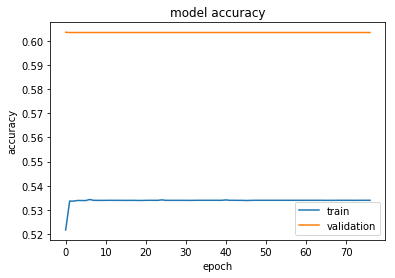

In [112]:
# Accuracy (Tutarlılık)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

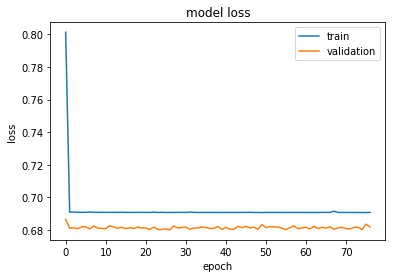

In [113]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

In [114]:
# [s1,s2] = model.evaluate(test_x,test_y,verbose=1)
# model.metrics_names
# [s1,s2]

# Regression - Toplam Miktar Tahmin (Keras)

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape=(reg_train_x.shape[1],),activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(1))

# optimizers: rmsprop, SGD, adam, Adagrad, Adadelta, adanorm, nadam
optimizer = tf.train.AdamOptimizer(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [29]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(reg_train_x, reg_train_y, epochs=500,verbose=2
                    ,callbacks=[early_stop], shuffle=True,
                   validation_data=(reg_test_x,reg_test_y))

Train on 45152 samples, validate on 8643 samples
Epoch 1/500
 - 1s - loss: 0.6133 - mean_absolute_error: 0.1867 - val_loss: 0.0059 - val_mean_absolute_error: 0.0518
Epoch 2/500
 - 1s - loss: 0.0668 - mean_absolute_error: 0.1530 - val_loss: 0.0487 - val_mean_absolute_error: 0.2058
Epoch 3/500
 - 1s - loss: 0.0600 - mean_absolute_error: 0.1538 - val_loss: 0.0156 - val_mean_absolute_error: 0.1148
Epoch 4/500
 - 1s - loss: 0.0526 - mean_absolute_error: 0.1446 - val_loss: 0.1159 - val_mean_absolute_error: 0.3232
Epoch 5/500
 - 1s - loss: 0.0462 - mean_absolute_error: 0.1273 - val_loss: 0.0085 - val_mean_absolute_error: 0.0696
Epoch 6/500
 - 1s - loss: 0.0342 - mean_absolute_error: 0.1206 - val_loss: 0.0328 - val_mean_absolute_error: 0.1679
Epoch 7/500
 - 1s - loss: 0.0425 - mean_absolute_error: 0.1046 - val_loss: 0.0159 - val_mean_absolute_error: 0.1145
Epoch 8/500
 - 1s - loss: 0.0355 - mean_absolute_error: 0.1236 - val_loss: 0.2958 - val_mean_absolute_error: 0.4876
Epoch 9/500
 - 1s - los

Epoch 70/500
 - 1s - loss: 1.8045e-04 - mean_absolute_error: 0.0090 - val_loss: 0.0030 - val_mean_absolute_error: 0.0512
Epoch 71/500
 - 1s - loss: 1.5528e-04 - mean_absolute_error: 0.0086 - val_loss: 0.0079 - val_mean_absolute_error: 0.0871
Epoch 72/500
 - 1s - loss: 1.6097e-04 - mean_absolute_error: 0.0087 - val_loss: 0.0061 - val_mean_absolute_error: 0.0762
Epoch 73/500
 - 1s - loss: 1.5024e-04 - mean_absolute_error: 0.0082 - val_loss: 0.0055 - val_mean_absolute_error: 0.0722
Epoch 74/500
 - 1s - loss: 1.4712e-04 - mean_absolute_error: 0.0081 - val_loss: 0.0062 - val_mean_absolute_error: 0.0766
Epoch 75/500
 - 1s - loss: 1.1241e-04 - mean_absolute_error: 0.0074 - val_loss: 0.0052 - val_mean_absolute_error: 0.0703
Epoch 76/500
 - 1s - loss: 1.2148e-04 - mean_absolute_error: 0.0073 - val_loss: 0.0046 - val_mean_absolute_error: 0.0656
Epoch 77/500
 - 1s - loss: 1.2595e-04 - mean_absolute_error: 0.0077 - val_loss: 0.0050 - val_mean_absolute_error: 0.0690
Epoch 78/500
 - 1s - loss: 1.017

Epoch 137/500
 - 1s - loss: 7.0851e-06 - mean_absolute_error: 0.0018 - val_loss: 1.2797e-04 - val_mean_absolute_error: 0.0106
Epoch 138/500
 - 1s - loss: 6.6997e-06 - mean_absolute_error: 0.0016 - val_loss: 7.5876e-05 - val_mean_absolute_error: 0.0078
Epoch 139/500
 - 1s - loss: 6.0267e-06 - mean_absolute_error: 0.0018 - val_loss: 1.1138e-04 - val_mean_absolute_error: 0.0102
Epoch 140/500
 - 1s - loss: 5.4185e-06 - mean_absolute_error: 0.0015 - val_loss: 1.0472e-04 - val_mean_absolute_error: 0.0096
Epoch 141/500
 - 1s - loss: 6.6847e-06 - mean_absolute_error: 0.0017 - val_loss: 1.5109e-04 - val_mean_absolute_error: 0.0115
Epoch 142/500
 - 1s - loss: 4.8421e-06 - mean_absolute_error: 0.0016 - val_loss: 6.9103e-05 - val_mean_absolute_error: 0.0071
Epoch 143/500
 - 1s - loss: 5.7078e-06 - mean_absolute_error: 0.0017 - val_loss: 9.8165e-05 - val_mean_absolute_error: 0.0088
Epoch 144/500
 - 1s - loss: 5.0817e-06 - mean_absolute_error: 0.0015 - val_loss: 2.2221e-04 - val_mean_absolute_error:

Epoch 202/500
 - 1s - loss: 3.6660e-06 - mean_absolute_error: 0.0011 - val_loss: 5.0260e-05 - val_mean_absolute_error: 0.0064
Epoch 203/500
 - 1s - loss: 4.7542e-06 - mean_absolute_error: 0.0012 - val_loss: 3.1000e-05 - val_mean_absolute_error: 0.0048
Epoch 204/500
 - 1s - loss: 3.7191e-06 - mean_absolute_error: 0.0011 - val_loss: 6.1491e-05 - val_mean_absolute_error: 0.0070
Epoch 205/500
 - 1s - loss: 9.2955e-06 - mean_absolute_error: 0.0014 - val_loss: 1.4730e-04 - val_mean_absolute_error: 0.0114
Epoch 206/500
 - 1s - loss: 2.3077e-06 - mean_absolute_error: 9.2897e-04 - val_loss: 1.3405e-05 - val_mean_absolute_error: 0.0021
Epoch 207/500
 - 1s - loss: 2.9838e-06 - mean_absolute_error: 0.0011 - val_loss: 1.0765e-04 - val_mean_absolute_error: 0.0099
Epoch 208/500
 - 1s - loss: 2.6414e-06 - mean_absolute_error: 0.0011 - val_loss: 4.7079e-05 - val_mean_absolute_error: 0.0061
Epoch 209/500
 - 1s - loss: 5.9701e-06 - mean_absolute_error: 0.0012 - val_loss: 4.8409e-05 - val_mean_absolute_er

Epoch 267/500
 - 1s - loss: 1.7077e-06 - mean_absolute_error: 8.6055e-04 - val_loss: 2.8461e-05 - val_mean_absolute_error: 0.0046
Epoch 268/500
 - 1s - loss: 2.1860e-06 - mean_absolute_error: 9.1968e-04 - val_loss: 3.9700e-05 - val_mean_absolute_error: 0.0055
Epoch 269/500
 - 1s - loss: 5.2817e-06 - mean_absolute_error: 0.0011 - val_loss: 5.8410e-05 - val_mean_absolute_error: 0.0069
Epoch 270/500
 - 1s - loss: 3.1372e-06 - mean_absolute_error: 7.7809e-04 - val_loss: 1.9693e-05 - val_mean_absolute_error: 0.0038
Epoch 271/500
 - 1s - loss: 3.7970e-06 - mean_absolute_error: 0.0012 - val_loss: 5.1028e-05 - val_mean_absolute_error: 0.0063
Epoch 272/500
 - 1s - loss: 4.9948e-06 - mean_absolute_error: 9.5684e-04 - val_loss: 5.3635e-05 - val_mean_absolute_error: 0.0066
Epoch 273/500
 - 1s - loss: 4.8352e-06 - mean_absolute_error: 9.6947e-04 - val_loss: 4.7855e-05 - val_mean_absolute_error: 0.0062
Epoch 274/500
 - 1s - loss: 3.4604e-06 - mean_absolute_error: 8.6485e-04 - val_loss: 5.8313e-05 - 

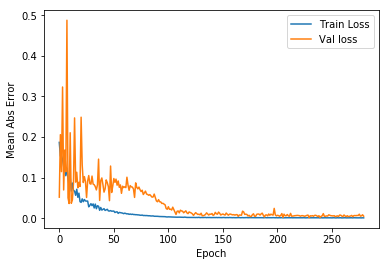

In [30]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
label = 'Val loss')
plt.legend()

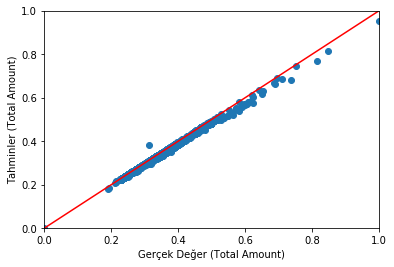

In [31]:
test_predictions = model.predict(reg_test_x).flatten()

plt.scatter(reg_test_y, test_predictions)
plt.xlabel('Gerçek Değer (Total Amount)')
plt.ylabel('Tahminler (Total Amount)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([-100, 100], [-100, 100],'r')

In [ ]:
# Logistic Regression (Softmax ile)

In [116]:
# model = keras.models.Sequential()
# model.add(keras.layers.Dense(32, input_shape=(softmax_train_x.shape[1],), activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(units=1,activation='softmax'))

# optimizer = tf.train.AdamOptimizer(0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [118]:
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
# history = model.fit(softmax_train_x, softmax_train_y, epochs=200,verbose=2
#                     ,callbacks=[early_stop], shuffle=True,
#                    validation_data=(softmax_test_x,softmax_test_y))